**Import Libraries**

In [ ]:
import numpy as np #for working with arrays, also helps in linear algebra and matrices
import pandas as pd #for data structure for manipulating numerical table and analysis
import matplotlib.pyplot as plt #for creating 2D graphs
import seaborn as sns #for data eploration and data visualization
from sklearn import svm
import math


**Read the File**

In [ ]:
df = pd.read_csv("/content/archive (1).zip") #reading files
df.head() #show firt five columns only

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df = df.drop(["loan_id"],axis=1) #Dropping unnecessary column (loan id) which has no relation of loan being approved.
df.head() #checking after dropping

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.shape #check the rows and columns of the dataset

(4269, 12)

In [ ]:
df.info() #check informaion like non null count and data type of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [ ]:
df.isnull().sum() #check if any dataset contains null values

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#fiting and transforming data for training (converting eduction, employement approved data into integer64)
df[" education"] = le.fit_transform(df[" education"])
df[" self_employed"] = le.fit_transform(df[" self_employed"])
df[" loan_status"] = le.fit_transform(df[" loan_status"])

In [ ]:
df.head() #checking after fitting and transforming

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [ ]:
#shows the statistics of the data according to their columns.
#i.e mean standard deviation, minimum, maximum, upper quartile, lower quartile and median
# higher values greener shade, lower values lighter shade
df.describe().T.style.background_gradient(cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
no_of_dependents,4269.000000,2.498712,1.695910,0.000000,1.000000,3.000000,4.000000,5.000000
education,4269.000000,0.497775,0.500054,0.000000,0.000000,0.000000,1.000000,1.000000
self_employed,4269.000000,0.503631,0.500045,0.000000,0.000000,1.000000,1.000000,1.000000
income_annum,4269.000000,5059123.916608,2806839.831818,200000.000000,2700000.000000,5100000.000000,7500000.000000,9900000.000000
loan_amount,4269.000000,15133450.456781,9043362.984843,300000.000000,7700000.000000,14500000.000000,21500000.000000,39500000.000000
loan_term,4269.000000,10.900445,5.709187,2.000000,6.000000,10.000000,16.000000,20.000000
cibil_score,4269.000000,599.936051,172.430401,300.000000,453.000000,600.000000,748.000000,900.000000
residential_assets_value,4269.000000,7472616.537831,6503636.587664,-100000.000000,2200000.000000,5600000.000000,11300000.000000,29100000.000000
commercial_assets_value,4269.000000,4973155.305692,4388966.089638,0.000000,1300000.000000,3700000.000000,7600000.000000,19400000.000000
luxury_assets_value,4269.000000,15126305.926446,9103753.665256,300000.000000,7500000.000000,14600000.000000,21700000.000000,39200000.000000


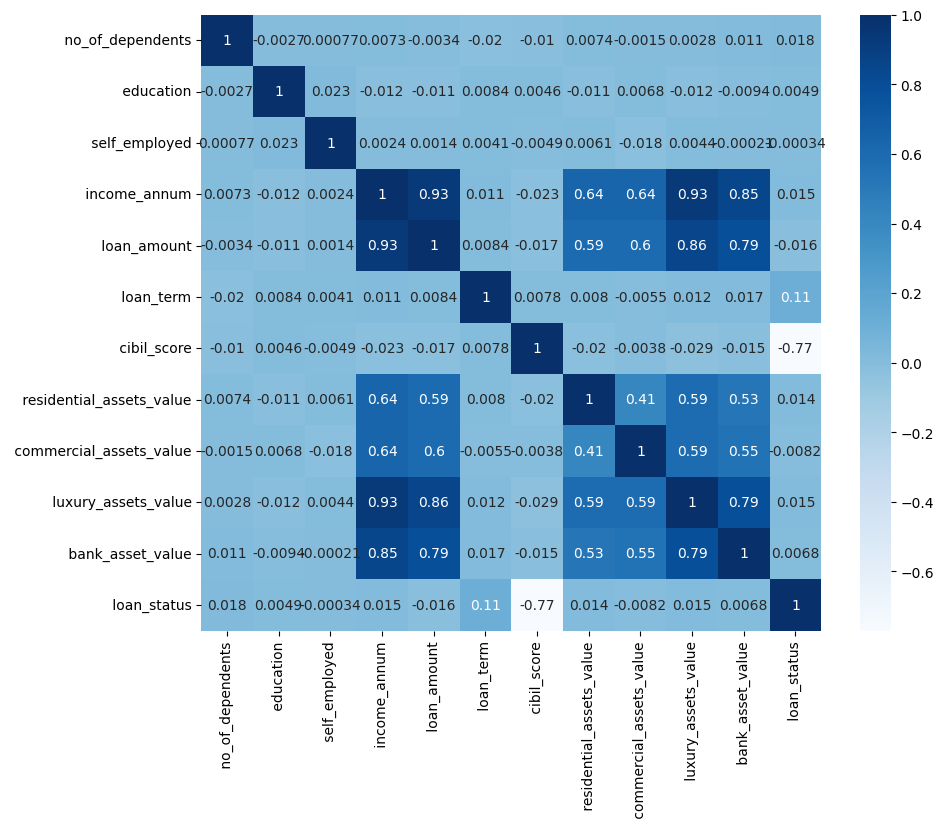

In [ ]:
plt.figure(figsize=(10,8)) #fixing the figure size 10inch to 8inch
sns.heatmap(df.corr(),annot=True,cmap="Blues")
#used seaborn heatma, calculates the correlation matrix of the DataFrame between -1 to 1.
# -1 indicates a perfect negative correlation,
# 0 indicates no correlation, and
# 1 indicates a perfect positive correlation.
#all the values from -1 to 0 shades heatmaps from lighter to bluer color.
plt.show()

number of people who take loan as group by  self_employed
 self_employed
1    2150
0    2119
Name: count, dtype: int64


<ipython-input-11-b1e038fde471>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' self_employed', data = df, palette = 'Set1')


<Axes: xlabel=' self_employed', ylabel='count'>

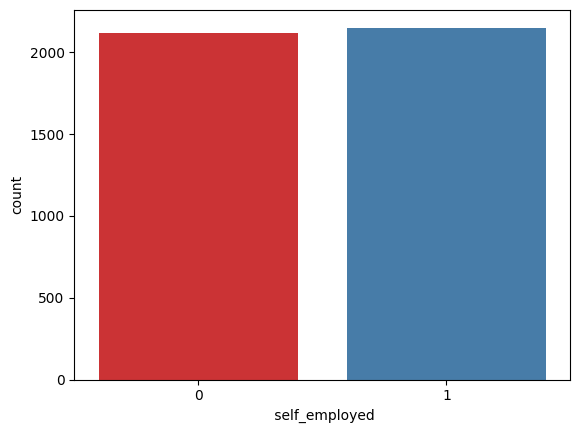

In [ ]:
print("number of people who take loan as group by  self_employed")
print(df[' self_employed'].value_counts())
sns.countplot(x=' self_employed', data = df, palette = 'Set1')

number of people who take loan as group by  loan status
 loan_status
0    2656
1    1613
Name: count, dtype: int64


<ipython-input-12-4911b3aaf0af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' loan_status', data = df, palette = 'Set1')


<Axes: xlabel=' loan_status', ylabel='count'>

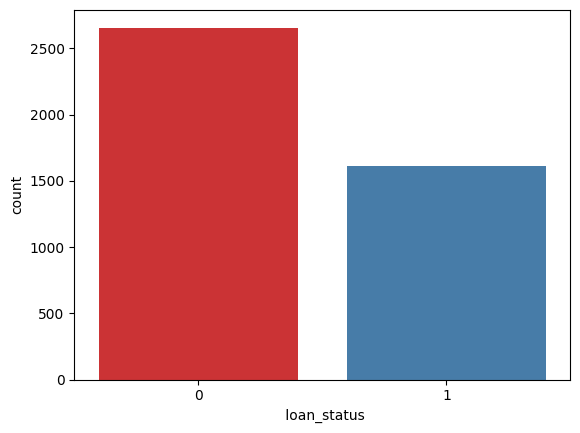

In [ ]:
print("number of people who take loan as group by  loan status")
print(df[' loan_status'].value_counts())
sns.countplot(x=' loan_status', data = df, palette = 'Set1')

number of people who take loan as group by education
 education
0    2144
1    2125
Name: count, dtype: int64


<ipython-input-13-93c3ee59a3af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' education', data = df, palette = 'Set1')


<Axes: xlabel=' education', ylabel='count'>

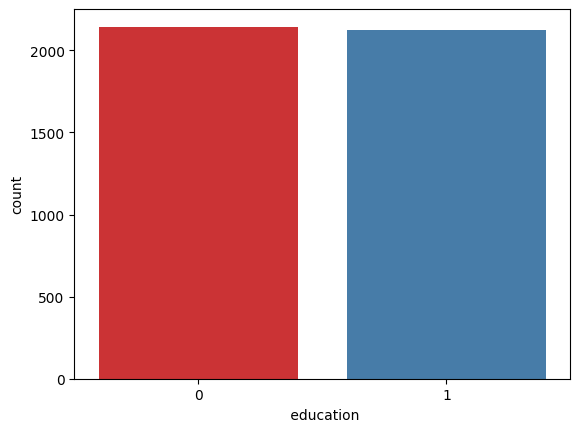

In [ ]:
print("number of people who take loan as group by education")
print(df[' education'].value_counts())
sns.countplot(x=' education', data = df, palette = 'Set1')

<Axes: xlabel=' cibil_score', ylabel=' loan_status'>

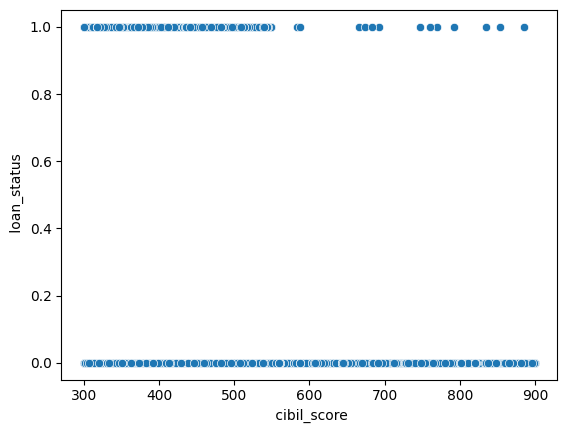

In [ ]:

sns.scatterplot(x=' cibil_score',y=' loan_status',data=df)


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)


**Training Testing Splitting Models**

In [ ]:
x = df.drop([" loan_status"],axis=1)
y = df[" loan_status"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
regpred = reg.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,regpred))
print("Accuracy of Logistic Regression is : ",accuracy_score(y_test,regpred)*100)

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       528
           1       0.00      0.00      0.00       326

    accuracy                           0.62       854
   macro avg       0.31      0.50      0.38       854
weighted avg       0.38      0.62      0.47       854

Accuracy of Logistic Regression is :  61.7096018735363


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("Mean Absolute Error : ",mean_absolute_error(y_test,regpred))
print("Mean Squared Error : ",mean_squared_error(y_test,regpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,regpred)))
print("R2 Score : ",r2_score(y_test,regpred))

Mean Absolute Error :  0.382903981264637
Mean Squared Error :  0.382903981264637
Root Mean Squared Error :  0.618792357147886
R2 Score :  -0.6223856664807583


**Decision Tree**

In [ ]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtreepred = dtree.predict(x_test)

print(classification_report(y_test,dtreepred))
print("Accuracy of Decision Tree is : ",accuracy_score(y_test,dtreepred)*100)


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       528
           1       0.96      0.96      0.96       326

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

Accuracy of Decision Tree is :  96.72131147540983


In [ ]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,dtreepred))
print("Mean Squared Error : ",mean_squared_error(y_test,dtreepred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,dtreepred)))
print("R2 Score : ",r2_score(y_test,dtreepred))

Mean Absolute Error :  0.03278688524590164
Mean Squared Error :  0.03278688524590164
Root Mean Squared Error :  0.18107149208503706
R2 Score :  0.8610801264175497


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_pred = nb_model.predict(x_test)

print(classification_report(y_test, nb_pred))
print("Accuracy of Naive Bayes is : ", accuracy_score(y_test, nb_pred)*100)


              precision    recall  f1-score   support

           0       0.72      0.96      0.83       528
           1       0.87      0.40      0.55       326

    accuracy                           0.75       854
   macro avg       0.80      0.68      0.69       854
weighted avg       0.78      0.75      0.72       854

Accuracy of Naive Bayes is :  75.05854800936767


In [ ]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,nb_pred))
print("Mean Squared Error : ",mean_squared_error(y_test,nb_pred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,nb_pred)))
print("R2 Score : ",r2_score(y_test,nb_pred))

Mean Absolute Error :  0.24941451990632318
Mean Squared Error :  0.24941451990632318
Root Mean Squared Error :  0.49941417671740473
R2 Score :  -0.05678332403792519


**Comparing Models**

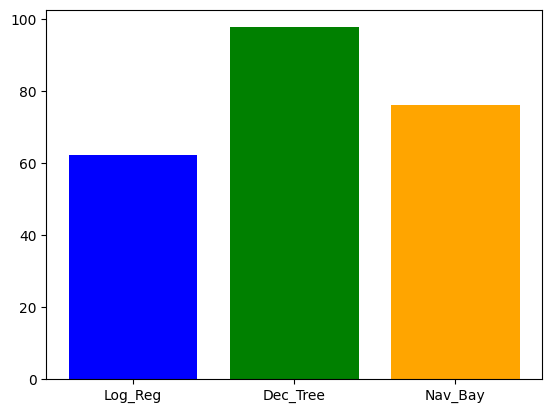

In [ ]:
Log_Reg = accuracy_score(y_test,regpred)*100
Dec_Tree = accuracy_score(y_test,dtreepred)*100
Nav_Bay = accuracy_score(y_test,nb_pred)*100

Model = ['Log_Reg','Dec_Tree','Nav_Bay']
Score = [Log_Reg,Dec_Tree,Nav_Bay]
colors = ['blue', 'green', 'orange']
barplot = plt.bar(x=Model,height=Score, color= colors)
plt.show()

**Select and Analyze**

In [ ]:
importances = dtree.feature_importances_
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': importances})

feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

                      feature  importance
6                 cibil_score    0.836139
5                   loan_term    0.076431
4                 loan_amount    0.040055
3                income_annum    0.025178
9         luxury_assets_value    0.008733
7    residential_assets_value    0.004244
8     commercial_assets_value    0.004190
0            no_of_dependents    0.003368
10           bank_asset_value    0.001663
1                   education    0.000000
2               self_employed    0.000000
